# Evaluation of Verifiable Decentralized IPFS Clusters (VDICs)
We tested:
1. read performance in VDICs depending on file size and number of nodes (vs. web3.storage pinning service vs. moralis pinning service vs. own node)
2. write performance in VDICs depending on file size and number of nodes (vs. web3.storage vs. moralis pinning service vs. own node)
3. estimate average latency in VDICs depending on file size and numbder of node

NOTE: 
- number of nodes: {3, 5, 10, 15, 20}
- file size (in KB): {1, 10, 100, 1000, 10000}

In this notebook, we analyze and evaluate the above listed metrics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## Performance of pinning service providers: Pinata and Moralis

### Moralis

In [2]:
# import csv files, located test-data folder
moralisReadPerformanceMeasurements = pd.read_csv(
    './test-suite-pinning-service/moralis-read-performance-measurements.csv',
    names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
)
moralisWritePerformanceMeasurements = pd.read_csv(
    './test-suite-pinning-service/moralis-write-performance-measurements.csv',
    names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
)

# cast for both dataframes the size column from object to base64
moralisReadPerformanceMeasurements['size'] = moralisReadPerformanceMeasurements['size'].apply(pd.to_numeric, errors='coerce')
moralisWritePerformanceMeasurements['size'] = moralisWritePerformanceMeasurements['size'].apply(pd.to_numeric, errors='coerce')

# create column which assign each line to value 1, 10, 100, 1000, 10000 based on size. Each line's size value will be assigned to the closest value from the list
values = [1, 10, 100, 1000, 10000]

# Create a function to find the closest value
def find_closest_value(x):
    return min(values, key=lambda v: abs(v - x))

# Apply the function to the 'size' column and create a new column 'sizeGroup'
moralisReadPerformanceMeasurements['sizeGroup'] = moralisReadPerformanceMeasurements['size'].apply(find_closest_value)
moralisWritePerformanceMeasurements['sizeGroup'] = moralisWritePerformanceMeasurements['size'].apply(find_closest_value)

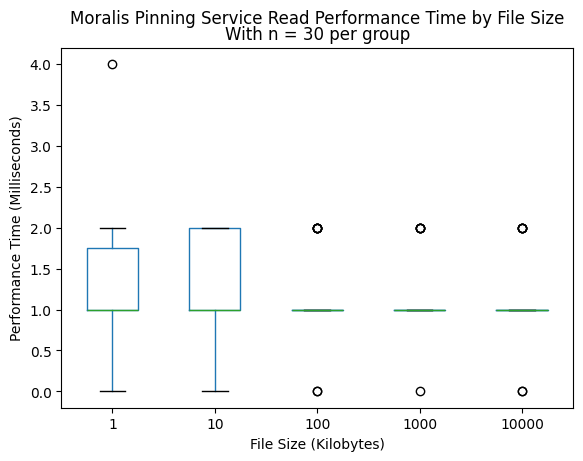

In [3]:
# remove outliers
cleanedMoralisReadPerformanceMeasurements = moralisReadPerformanceMeasurements[
    (moralisReadPerformanceMeasurements['performanceTime'] < 20)
]

# remove files with size nan
cleanedMoralisReadPerformanceMeasurements = cleanedMoralisReadPerformanceMeasurements[
    (cleanedMoralisReadPerformanceMeasurements['size'].notna())
]

# create boxplot of performanceTime based on sizeGroup
boxplot = cleanedMoralisReadPerformanceMeasurements.boxplot(column=['performanceTime'], by='sizeGroup', grid=False)
plt.title('With n = 30 per group')
plt.suptitle('Moralis Pinning Service Read Performance Time by File Size')
plt.xlabel('File Size (Kilobytes)')
plt.ylabel('Performance Time (Milliseconds)')
plt.savefig('./evaluation-figures/moralis-read-performance-time-by-file-size.png')
plt.show()


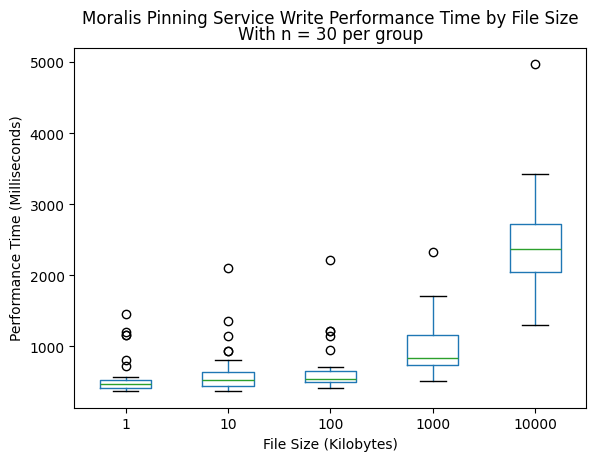

In [4]:
# do the same as in cell before but for write performance measurements
cleanedMoralisWritePerformanceMeasurements = moralisWritePerformanceMeasurements[
    (moralisWritePerformanceMeasurements['performanceTime'] < 5000)
]  

cleanedMoralisWritePerformanceMeasurements = cleanedMoralisWritePerformanceMeasurements[
    (cleanedMoralisWritePerformanceMeasurements['size'].notna())
]

boxplot = cleanedMoralisWritePerformanceMeasurements.boxplot(column=['performanceTime'], by='sizeGroup', grid=False)
plt.title('With n = 30 per group')
plt.suptitle('Moralis Pinning Service Write Performance Time by File Size')
plt.xlabel('File Size (Kilobytes)')
plt.ylabel('Performance Time (Milliseconds)')
plt.savefig('./evaluation-figures/moralis-write-performance-time-by-file-size.png')
plt.show()

### Pinata

In [5]:
# import csv files, located test-data folder
pinataReadPerformanceMeasurements = pd.read_csv(
    './test-suite-pinning-service/pinata-read-performance-measurements.csv',
    names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
)
pinataWritePerformanceMeasurements = pd.read_csv(
    './test-suite-pinning-service/pinata-write-performance-measurements.csv',
    names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
)

# cast for both dataframes the size column from object to base64
pinataReadPerformanceMeasurements['size'] = pinataReadPerformanceMeasurements['size'].apply(pd.to_numeric, errors='coerce')
pinataWritePerformanceMeasurements['size'] = pinataWritePerformanceMeasurements['size'].apply(pd.to_numeric, errors='coerce')

# create column which assign each line to value 1, 10, 100, 1000, 10000 based on size. Each line's size value will be assigned to the closest value from the list
values = [1, 10, 100, 1000, 10000]

# Create a function to find the closest value
def find_closest_value(x):
    return min(values, key=lambda v: abs(v - x))

# Apply the function to the 'size' column and create a new column 'sizeGroup'
pinataReadPerformanceMeasurements['sizeGroup'] = pinataReadPerformanceMeasurements['size'].apply(find_closest_value)
pinataWritePerformanceMeasurements['sizeGroup'] = pinataWritePerformanceMeasurements['size'].apply(find_closest_value)

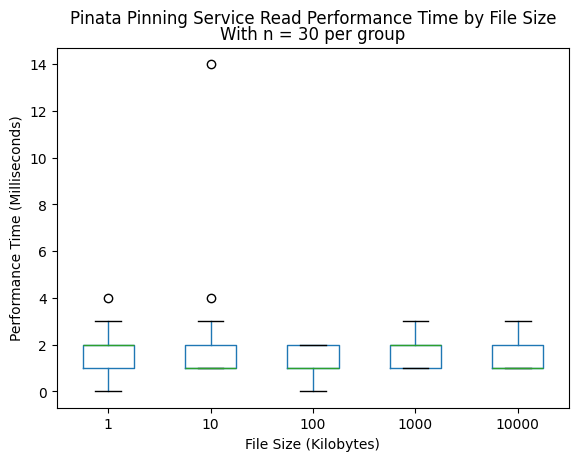

In [6]:
# remove outliers
cleanedPinataReadPerformanceMeasurements = pinataReadPerformanceMeasurements[
    (pinataReadPerformanceMeasurements['performanceTime'] < 20)
]

# remove files with size nan
cleanedPinataReadPerformanceMeasurements = cleanedPinataReadPerformanceMeasurements[
    (cleanedPinataReadPerformanceMeasurements['size'].notna())
]

# create boxplot of performanceTime based on sizeGroup
boxplot = cleanedPinataReadPerformanceMeasurements.boxplot(column=['performanceTime'], by='sizeGroup', grid=False)
plt.title('With n = 30 per group')
plt.suptitle('Pinata Pinning Service Read Performance Time by File Size')
plt.xlabel('File Size (Kilobytes)')
plt.ylabel('Performance Time (Milliseconds)')
plt.savefig('./evaluation-figures/pinata-read-performance-time-by-file-size.png')
plt.show()

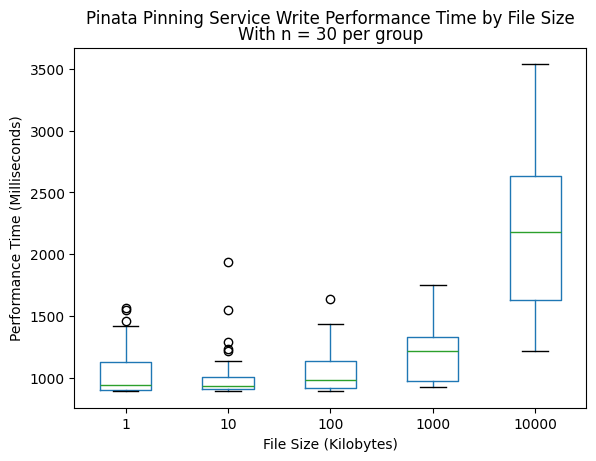

In [7]:
# do the same as in cell before but for write performance measurements
cleanedPinataWritePerformanceMeasurements = pinataWritePerformanceMeasurements[
    (pinataWritePerformanceMeasurements['performanceTime'] < 5000)
]  

cleanedPinataWritePerformanceMeasurements = cleanedPinataWritePerformanceMeasurements[
    (cleanedPinataWritePerformanceMeasurements['size'].notna())
]

boxplot = cleanedPinataWritePerformanceMeasurements.boxplot(column=['performanceTime'], by='sizeGroup', grid=False)
plt.title('With n = 30 per group')
plt.suptitle('Pinata Pinning Service Write Performance Time by File Size')
plt.xlabel('File Size (Kilobytes)')
plt.ylabel('Performance Time (Milliseconds)')
plt.savefig('./evaluation-figures/pinata-write-performance-time-by-file-size.png')
plt.show()

## Performance of VDICs

In [ ]:
# import performance measurements of tested VDICs with different number of nodes
vdics = [
    {
        "numberOfNodes": 3,
        "readPerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/3-node-vdic-read-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        ),
        "writePerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/3-node-vdic-write-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        )
    },
   {
        "numberOfNodes": 5,
        "readPerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/5-node-vdic-read-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        ),
        "writePerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/5-node-vdic-write-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        )
    },
    {
        "numberOfNodes": 10,
        "readPerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/10-node-vdic-read-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        ),
        "writePerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/10-node-vdic-write-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        )
    },
    {
        "numberOfNodes": 15,
        "readPerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/15-node-vdic-read-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        ),
        "writePerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/15-node-vdic-write-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        )
    },
    {
        "numberOfNodes": 20,
        "readPerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/20-node-vdic-read-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        ),
        "writePerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/20-node-vdic-write-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        )
    }
]